# Examples of class usage
The purpose of this notebook is to provide examples of the different concepts of the framework and its implementation. The code in this notebook is not part of the implementation of the problem. 

In [1]:
import metadata_analysis as md
#from ipynb.fs.full.case_mobility import *  # import test case mobility

# Variables

Example usage:

In [2]:
v1 = md.Variable("a", 0)
print(v1)

v2 = md.Variable("b", 2)
print(v2)

v3 = md.Variable("a", 0)
print(v3)

a_0
b_2
a_0


For equality, only the self.name and granularity must be equal. A different object name (in this example "v1" and "v3") does not affect equality.

In [3]:
print(v1 == v2)
print(v1 == v3)

False
True


The hashes of v1 and v3 are equal, and distinct to v2.

In [4]:
print(hash(v1))
print(hash(v2))
print(hash(v3))

-3733291097083509486
-3842073964301029683
-3733291097083509486


# Conversion

In [5]:
# create conversion graphs
con1 = md.ConversionGraph(variable_name="a",
                          granularities=[0, 1, 2, 3],
                          conversion_edges=[(0, 1), (1, 2), (0, 3), (0, 4), (5, 6)])
con2 = md.ConversionGraph(variable_name="b",
                          granularities=[0, 1, 2, 3, 5, 6],
                          conversion_edges=[(0, 1), (1, 2), (0, 3), (0, 4), (4, 5)])
con3 = md.ConversionGraph(variable_name="c",
                          granularities=[0, 1, 2, 3, 5, 6],
                          conversion_edges=[(0, 1), (0, 2), (0, 3), (0, 4), (3, 5), (1, 6), (6, 7), (3, 6)])
con4 = md.ConversionGraph(variable_name="d",
                          granularities=[0, 1, 2, 3],
                          conversion_edges=[(0, 1), (1, 2), (0, 3), (0, 4), (5, 6)])
con5 = md.ConversionGraph(variable_name="e",
                          granularities=[0, 1, 2, 3, 5, 6],
                          conversion_edges=[(0, 1), (1, 2), (0, 3), (0, 4), (4, 5)])
con6 = md.ConversionGraph(variable_name="f",
                          granularities=[0, 1, 2, 3, 5, 6],
                         conversion_edges = [(0, 1), (0,2), (0,3), (0, 4), (3, 5), (1, 6), (6,7), (3,6)])

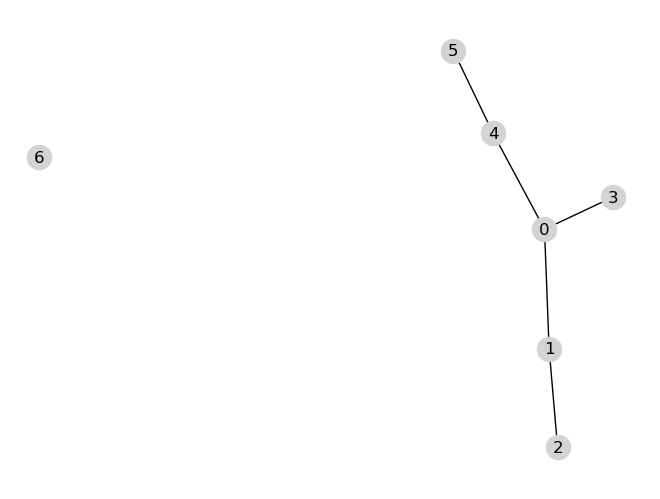

In [6]:
# plot conversion graph
con2.plot_graph()

Is there a convsersion (path) between granularities (nodes) possible?

In [7]:
print(con1.check_conversion(2, 4))
print(con1.check_conversion(0, 5))

True
False


Which granularities can be converted from a specific granularity?

In [8]:
print(con1.all_conversions(0))
print(con1.all_conversions(5))

{1, 2, 3, 4}
{6}


The classmethod get() allows us to find an instance of the class for a desired variable name. In the following code, switch between var_name "a" and "b" and execute the plot to see that the correct instance is found in this way. This will be usefull later, when a dataset with variables is known and we want to find a conversiongraph for one of the variables, without having to hard code the variable name.

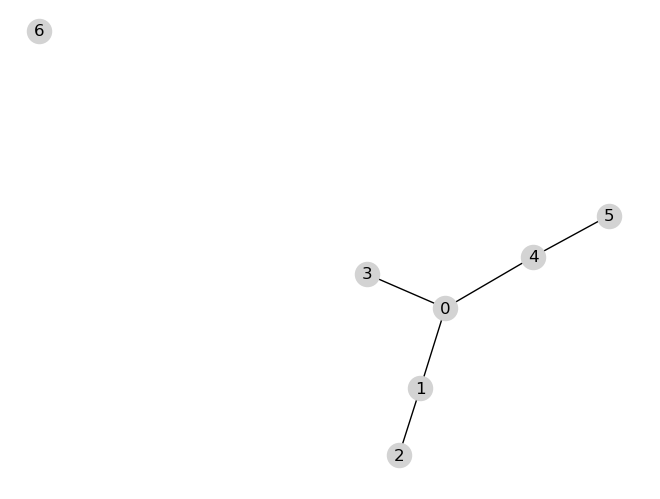

In [9]:
con_x = md.ConversionGraph.get(var_name = "b")
con_x.plot_graph()

If the ConversionGraph was not initialised, it will raise an error. Due to the `%%script true` line, the error that would be raised by this cell does not stop a `Run all`. To execute this cell, remove or comment out the `%%script true` line. 

In [10]:
%%script true
con_x = md.ConversionGraph.get(var_name = "z")
con_x.plot_graph()

# Aggregation
Aggregation is only dependent on the variable itself, not on the data set it is in. It functions as a directed graph.

In [11]:
# create aggregation graphs
agg1 = md.AggregationGraph(variable_name = "a",
                        granularities = [0,1,2,3, 5, 6],
                        aggregation_edges = [(0,1), (1,2), (2,5), (0,6), (0, 4), (5, 6)])

agg2 = md.AggregationGraph(variable_name = "b",
                        granularities = [0,1,2,3],
                        aggregation_edges = [(0,1), (1,2), (2,1), (0,3), (0, 4), (5, 6)])

agg3 = md.AggregationGraph(variable_name = "c",
                        granularities = [0,1,2,3],
                        aggregation_edges = [(0,1), (1,2), (2,1), (0,3), (0, 4), (5, 6), (1,7)])

agg4 = md.AggregationGraph(variable_name = "d",
                        granularities = [0,1,2,3, 5, 6],
                        aggregation_edges = [(0,1), (1,2), (2,5), (0,6), (0, 4), (5, 6)])

agg5 = md.AggregationGraph(variable_name = "e",
                        granularities = [0,1,2,3],
                        aggregation_edges = [(0,1), (1,2), (2,1), (0,3), (0, 4), (5, 6)])

agg6 = md.AggregationGraph(variable_name = "f",
                        granularities = [0,1,2,3],
                        aggregation_edges = [(0,1), (1,2), (2,1), (0,3), (0, 4), (5, 6), (1,7)])

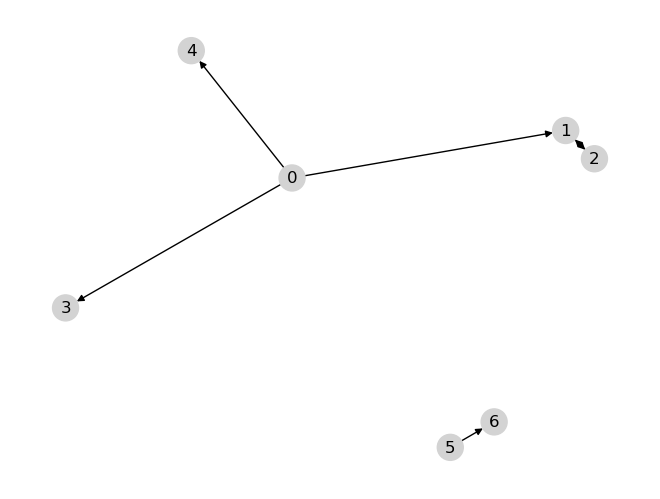

In [12]:
# plot aggregation graph
agg2.plot_graph()

In [13]:
print(agg1.check_aggregation(2, 4))
print(agg1.check_aggregation(0, 2))
print(agg1.check_aggregation(0, 5))

False
True
True


Which granularities can be converted from a specific granularity?

In [14]:
print(agg1.all_aggregations(0))
print(agg2.all_aggregations(1))

{1, 2, 4, 5, 6}
{2}


[0, 1, 2, 3]


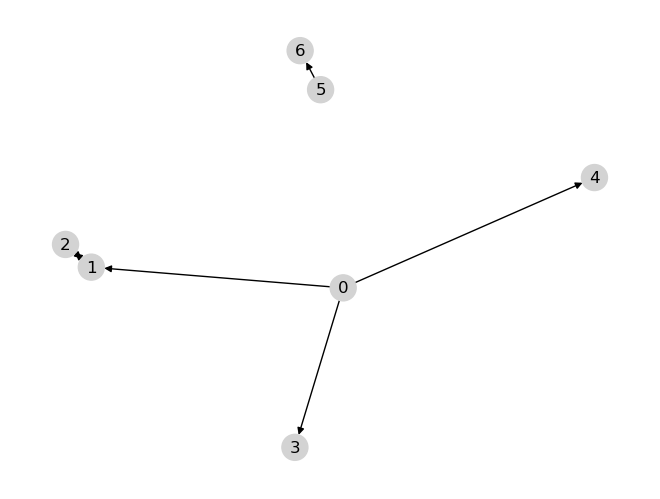

In [15]:
agg_x = md.AggregationGraph.get("b")
print(agg_x.granularities)
agg_x.plot_graph()

# Aggregation table
An aggregation table describes the relation between values from one granularity to another granularity. It describes exactly one edge of the aggregation graph. Aggregation tables are used in the description of a set of included units. Note: an aggregation graph must be defined before a corresponding aggegration table can be defined (a NotInitialisedError will let you know). 

In [16]:
# test with adding atribute to graph
agg1 = md.AggregationGraph(variable_name = "a",
                           granularities = [0,1,2,3, 5, 6],
                           aggregation_edges = [(0,1), (1,2), (2,5), (0,6), (0, 4), (5, 6)])

/home/ygzn@cbsp.nl/phd/MetadataFrameworkInternal/202507_for_external/metadata_analysis/metadata/aggregation.py:26: UserWarning: Overwriting the AggregationGraph for variable a!
  warnings.warn("Overwriting the AggregationGraph for variable "+str(variable_name)+"!")


In [17]:
at_1 = md.AggregationTable(variable_name="a", granularity_from=0, granularity_to=1, 
                           value_map={"ab": {"aa", "bb"}, 
                                      "cd": {"cc", "dd"}, 
                                      "ef": {"ee", "ff"},
                                      "gg": {"gg"}})
#at_2 = AggregationTable(variable_name="a", granularity_from=1, granularity_to=2, 
#                        value_map={0: {"ab", "cd"}, 
#                                   1: {"ef", "gg"}})
print(at_1)

AggregationTable of variable a: 0 -> 1. Map: 
      ab: {aa, bb},
      cd: {cc, dd},
      ef: {ee, ff},
      gg: {gg}


In [18]:
at_2 = md.AggregationTable(variable_name="a", granularity_from=1, granularity_to=2, 
                        value_map={0: {"ab", "cd"}, 
                                   1: {"ef", "gg"}})
print(at_2)

AggregationTable of variable a: 1 -> 2. Map: 
      0: {ab, cd},
      1: {ef, gg}


In [19]:
# lookup an aggregation table for a specific edge in the aggregation graph
at_returned = agg1.get_aggregation_table(0, 1)

# aggregation tables are printed with the following format
print(at_returned)

AggregationTable of variable a: 0 -> 1. Map: 
      ab: {aa, bb},
      cd: {cc, dd},
      ef: {ee, ff},
      gg: {gg}


Edges with an aggregation table specified, will be displayed in blue when the graph is plotted.

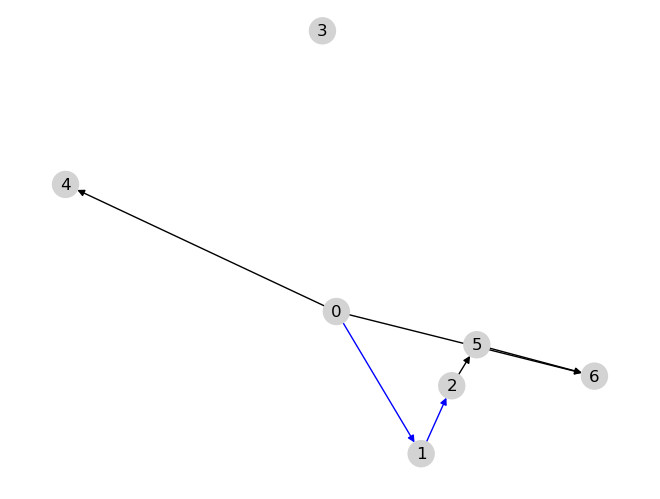

In [20]:
agg1.plot_graph()

In [21]:
print(at_1)
print(at_2)

AggregationTable of variable a: 0 -> 1. Map: 
      ab: {aa, bb},
      cd: {cc, dd},
      ef: {ee, ff},
      gg: {gg}
AggregationTable of variable a: 1 -> 2. Map: 
      0: {ab, cd},
      1: {ef, gg}


Two aggregation tables can be chained such that the resulting table reflects the application of applying both aggregation tables one after the other. A requirement is that the aggregation tables must be defined on the same variable names, and there must be one granularity in common (if not, warnings will be raised).

In [22]:
at_chained = at_2.chain(at_1)
print(at_chained)

AggregationTable of variable a: 0 -> 1 -> 2. Map: 
      0: {aa, bb, cc, dd},
      1: {ee, ff, gg}


Chaining aggregation tables into a new table automatically creates a "shortcut" edge in the aggregation graph. Shortcut edges can be recognised in the plot by a blue dotted line. 

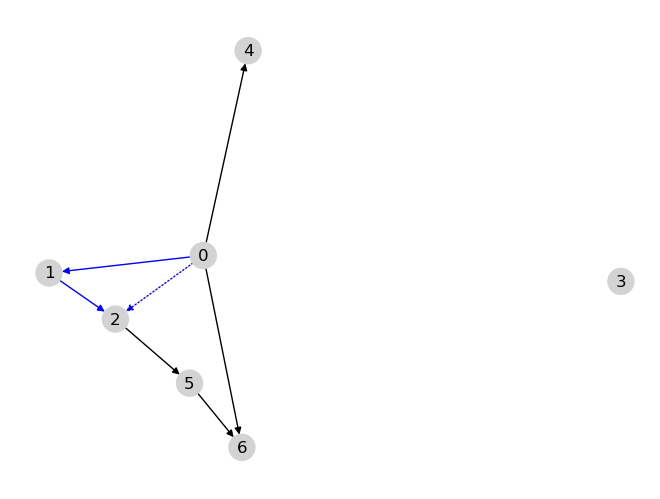

In [23]:
agg1.plot_graph()

# Specifying variables
Third type of variable, where we need to know all possible values.

In [24]:
varsou_a0 = md.VariableSpec("a", 0, {"aa", "bb", "cc", "dd", "ee", "ff", "gg"})
print(varsou_a0)

varsou_a1 = md.VariableSpec("a", 1, {"ab", "cd", "ef", "gg"})
print(varsou_a1)

varsou_a2 = md.VariableSpec("a", 2, {0, 1})
print(varsou_a2)

a_0: {aa, bb, cc, dd, ee, ff, gg}
a_1: {ab, cd, ef, gg}
a_2: {0, 1}


### Set operators for Specifying Variables
`AggregationTables` define the relations between specifying variables and inform operators such as `is_subset()`, `union()` and `intersection()`. 

In [25]:
varspec_a0 = md.VariableSpec("a", 0, {"aa", "bb", "cc"})
print(varspec_a0)

varspec_a1 = md.VariableSpec("a", 1, {"ab", "cd"})
print(varspec_a1)

varspec_a2 = md.VariableSpec("a", 2, {0})
print(varspec_a2)

a_0: {aa, bb, cc}
a_1: {ab, cd}
a_2: {0}


In [26]:
print(varspec_a0.is_subset(varspec_a1))  # True
print(varspec_a1.is_subset(varspec_a2))  # True
print(varspec_a0.is_subset(varspec_a2))  # True
print(varspec_a1.is_subset(varspec_a0))  # False
print(varspec_a0.is_subset(varspec_a0))  # True

True
True
True
False
True


In [27]:
varspec_a0 = md.VariableSpec("a", 0, {"aa", "bb", "cc", "dd", "ee"})
print(varspec_a0)

varspec_a2 = md.VariableSpec("a", 2, {0})
print(varspec_a2)

print(varspec_a0.is_subset(varspec_a2))  # False
print(varspec_a2.is_subset(varspec_a0))  # True

a_0: {aa, bb, cc, dd, ee}
a_2: {0}
False
True


If the specifying variables are for different variable names, they can never be subsets. (Even if the granularity and values_available are an exact match.)

In [28]:
md.VariableSpec("a", 2, {1}).is_subset(md.VariableSpec("b", 2, {1}))

False

Intersections for specifying variables.

In [29]:
print(md.VariableSpec("a", 2, {0, 1}).intersection(md.VariableSpec("a", 2, {0})))
print(md.VariableSpec("a", 2, {0, 1}).intersection(md.VariableSpec("a", 2, {1,2,0})))
print(md.VariableSpec("a", 2, {0, 1}).intersection(md.VariableSpec("b", 2, {0})))
print(md.VariableSpec("a", 2, {0, 1}).intersection(md.VariableSpec("a", 2, {2,3})))
print(md.VariableSpec("a", 2, {0}).intersection(md.VariableSpec("a", 0, {"aa", "bb", "ee", "gg"})))

a_2: {0}
a_2: {0, 1}
False
a_2: {}
a_0: {aa, bb}


Union for specifying variables.

In [30]:
print(md.VariableSpec("a", 2, {1}).union(md.VariableSpec("a", 2, {0})))
print(md.VariableSpec("a", 2, {0, 1}).union(md.VariableSpec("a", 2, {1,2})))
print(md.VariableSpec("a", 2, {0, 1}).union(md.VariableSpec("b", 2, {0})))
print(md.VariableSpec("a", 2, {0, 1}).union(md.VariableSpec("a", 2, {2,3})))
print(md.VariableSpec("a", 2, {0}).union(md.VariableSpec("a", 0, {"aa", "bb", "ee", "gg"})))

a_2: {0, 1}
a_2: {0, 1, 2}
False
a_2: {0, 1, 2, 3}
a_0: {aa, bb, cc, dd, ee, gg}


# Set of Included Units
A set of included units is defined by one unit type (a variable), and by a set of specifying variables. 

In [31]:
sou1 = md.SetOfIncludedUnits(name = "I", unit_type_var = md.Variable("p", 0), 
                             specifying_variables = {md.VariableSpec("a", 2, {1}), 
                                                     md.VariableSpec("b", 2, {0})})
print(sou1)

sou2 = md.SetOfIncludedUnits(name = "II", unit_type_var = md.Variable("p", 0), 
                             specifying_variables = {md.VariableSpec("a", 2, {0, 1}), 
                                                     md.VariableSpec("b", 2, {0,1})})
print(sou2)

sou3 = md.SetOfIncludedUnits(name = "III", unit_type_var = md.Variable("p", 0), 
                             specifying_variables = {md.VariableSpec("a", 0, {"aa", "bb", "dd", "ff"}), 
                                                     md.VariableSpec("b", 2, {0,1})})
print(sou3)

sou4 = md.SetOfIncludedUnits(name = "IV", unit_type_var = md.Variable("x", 0), 
                             specifying_variables = {md.VariableSpec("a", 0, {"aa", "bb", "dd", "ff"}), 
                                                     md.VariableSpec("b", 2, {0,1})})
print(sou4)


I: {p_0 -- a_2: {1}, b_2: {0}}
II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}
III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}
IV: {x_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}


A set of included units is a subset of another set of included units if they have the same unit type, and if every specifying variable is a subset of a specifying variable of the other set of inlcuded units. 

In [32]:
print("I \u2286 II:", sou1.is_subset(sou2))
print("II \u2286 I:", sou2.is_subset(sou1))

print("III \u2286 I:", sou3.is_subset(sou1))
print("I \u2286 III:", sou1.is_subset(sou3))
print("II \u2286 III:", sou2.is_subset(sou3))
print("III \u2286 II:", sou3.is_subset(sou2))

I ⊆ II: True
II ⊆ I: False
III ⊆ I: False
I ⊆ III: False
II ⊆ III: False
III ⊆ II: True


Intersections of sets of included units.

In [33]:
print(sou1)
print(sou2)
print(sou3)
print("")
for sou_a in [sou1, sou2, sou3]:
    for sou_b in [sou1, sou2, sou3]:
        print(sou_a.intersection(sou_b))

I: {p_0 -- a_2: {1}, b_2: {0}}
II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}
III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}

I: {p_0 -- a_2: {1}, b_2: {0}}
I: {p_0 -- a_2: {1}, b_2: {0}}
I ∩ III: {p_0 -- a_0: {ff}, b_2: {0}}
I: {p_0 -- a_2: {1}, b_2: {0}}
II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}
III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}
I ∩ III: {p_0 -- a_0: {ff}, b_2: {0}}
III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}
III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}


# Set of Included Units Union
Required because not all unions of a soiu can be simplified in the form of a single soiu. We name these soiuc.

In [34]:
print(sou1)
print(sou2)
print(sou3)
print(sou4)
print("")
for sou_a in [sou1, sou2, sou3, sou4]:
    for sou_b in [sou1, sou2, sou3, sou4]:
        print(sou_a.union(sou_b))

I: {p_0 -- a_2: {1}, b_2: {0}}
II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}
III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}
IV: {x_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}

I: {p_0 -- a_2: {1}, b_2: {0}}
II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}
I ∪ III: {I: {p_0 -- a_2: {1}, b_2: {0}}, III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}}
False
II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}
II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}
II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}
False
I ∪ III: {I: {p_0 -- a_2: {1}, b_2: {0}}, III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}}
II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}
III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}
False
False
False
False
IV: {x_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}


In [35]:
# create a soiuc from three soiu's
soiuc123 = md.SetOfIncludedUnitsUnion(set_of_soiu=[sou1, sou3, sou2])
print(soiuc123)

I ∪ II ∪ III: {I: {p_0 -- a_2: {1}, b_2: {0}}, II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}, III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}}


Get the minimum granularities of all specifying variable used in the description of the SOIUUnion.

In [36]:
soiuc123.get_minimum_granularities()

{'a': 0, 'b': 2}

Create a soiuc from more than two soiu's. The naming should contain II only once.

In [37]:
# create a soiuc from three soiu's
soiuc12 = md.SetOfIncludedUnitsUnion(set_of_soiu=[sou1, sou2])
print(soiuc12)
soiuc23 = md.SetOfIncludedUnitsUnion(set_of_soiu=[sou2, sou3])
print(soiuc23)
soiuc12_23 = soiuc12.union(soiuc23)
print(soiuc12_23)

I ∪ II: {I: {p_0 -- a_2: {1}, b_2: {0}}, II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}}
II ∪ III: {II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}, III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}}
I ∪ II: {I: {p_0 -- a_2: {1}, b_2: {0}}, II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}}


Intersection between soiuc.

In [38]:
# intersection
soiuc12_23 = soiuc12.intersection(soiuc23)
print(soiuc12_23)

I ∪ II: {I: {p_0 -- a_2: {1}, b_2: {0}}, II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}}


Get the minimally used granularities across all variables in the soiuc.

In [39]:
soiuc123.get_minimum_granularities()

{'a': 0, 'b': 2}

A soiu can be changed to desired granularity levels. 

In [40]:
print("original soiu: ", sou2)
desired_grans = soiuc123.get_minimum_granularities()
print("desired_granularities: ", desired_grans)
sou2_adjusted = sou2.adjust_granularities(desired_grans)
print("adjusted soiu: ", sou2_adjusted)

original soiu:  II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}
desired_granularities:  {'a': 0, 'b': 2}
adjusted soiu:  II: {p_0 -- a_0: {aa, bb, cc, dd, ee, ff, gg}, b_2: {0, 1}}


A soiu can be turned into a soiuc using all value combinations in the soiu.

In [41]:
print([str(x) for x in sou2.split()])

['II_0: {p_0 -- a_2: {0}, b_2: {0}}', 'II_1: {p_0 -- a_2: {1}, b_2: {0}}', 'II_2: {p_0 -- a_2: {0}, b_2: {1}}', 'II_3: {p_0 -- a_2: {1}, b_2: {1}}']


We can determine if a soiu or soiuc is a subset of a soiuc:

In [42]:
print(sou1)
print(sou2)
print(sou3)
print(sou4)
print("")
for sou_a in [sou1, sou2, sou3, sou4, sou1.union(sou2), sou2.union(sou3)]:
    for sou_b in [sou1, sou2, sou3, sou4, sou1.union(sou2), sou2.union(sou3)]:
        print(sou_a.name, " \u2286 ", sou_b.name, ": ", sou_a.is_subset(sou_b))

I: {p_0 -- a_2: {1}, b_2: {0}}
II: {p_0 -- a_2: {0, 1}, b_2: {0, 1}}
III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}
IV: {x_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}

I  ⊆  I :  True
I  ⊆  II :  True
I  ⊆  III :  False
I  ⊆  IV :  False
I  ⊆  II :  True
I  ⊆  II :  True
II  ⊆  I :  False
II  ⊆  II :  True
II  ⊆  III :  False
II  ⊆  IV :  False
II  ⊆  II :  True
II  ⊆  II :  True
III  ⊆  I :  False
III  ⊆  II :  True
III  ⊆  III :  True
III  ⊆  IV :  False
III  ⊆  II :  True
III  ⊆  II :  True
IV  ⊆  I :  False
IV  ⊆  II :  False
IV  ⊆  III :  False
IV  ⊆  IV :  True
IV  ⊆  II :  False
IV  ⊆  II :  False
II  ⊆  I :  False
II  ⊆  II :  True
II  ⊆  III :  False
II  ⊆  IV :  False
II  ⊆  II :  True
II  ⊆  II :  True
II  ⊆  I :  False
II  ⊆  II :  True
II  ⊆  III :  False
II  ⊆  IV :  False
II  ⊆  II :  True
II  ⊆  II :  True


# Data set
Contains a list of left-hand variables and a list of right-hand variables.

In [43]:
data1 = md.Data(left_variables =[md.Variable("a", 1), md.Variable("b", 3)],
                right_variables =[md.Variable("b", 1), md.Variable("a", 2)],
                set_of_units=sou1,
                name="data 1")
data2 = md.Data(left_variables =[md.Variable("e", 1), md.Variable("b", 3)],
          right_variables =[md.Variable("c", 1), md.Variable("a", 3)],
         set_of_units=sou1,
                name="data 2")
data3 = md.Data(left_variables =[md.Variable("a", 1), md.Variable("b", 3)],
          right_variables =[md.Variable("c", 1), md.Variable("a", 3)],
         set_of_units=sou2,
                name="data 3")
data4 = md.Data(left_variables =[md.Variable("a", 1), md.Variable("b", 3)],
          right_variables =[md.Variable("c", 1), md.Variable("a", 3)],
         set_of_units=sou4,
                name="data 4")

for d in [data1, data2, data3, data4]:
    print(d)


data 1 (a_1, b_3 | a_2, b_1)_I
data 2 (b_3, e_1 | a_3, c_1)_I
data 3 (a_1, b_3 | a_3, c_1)_II
data 4 (a_1, b_3 | a_3, c_1)_IV


Euquality depends on the equality of left_variables, right_variables and set of included units. A different name for the same data sources does not affect eqality:

In [44]:
print(data1 == data2)
print(data1 == data3)  
print(data1 == data4)

False
False
False


Similarity between two data sources is based on the variables and units they have in common. If two data sets are equal, then the similarity score will be huge.

In [45]:
print(data1.similarity(data2))
print(data1.similarity(data3))
print(data2.similarity(data3))
print(data1.similarity(data1))

11
11
15
11


Neighbours of a data source are defined as all other data sources that can be created by a single conversion or aggregation. Note that combination is not included here, because it requires two input data sources.

In [46]:
print(str(data1) + " has neighbours: ")

neighbours = data1.get_neighbours()
for n in neighbours:
    print(n)

data 1 (a_1, b_3 | a_2, b_1)_I has neighbours: 
data 1(->conv) (a_1, b_4 | a_2, b_1)_I
data 1(->conv) (a_1, b_2 | a_2, b_1)_I
data 1(->conv) (a_1, b_1 | a_2, b_1)_I
data 1(->conv) (a_0, b_3 | a_2, b_1)_I
data 1(a_2 -agg-> a_6) (a_1, b_3 | a_6, b_1)_I
data 1(->conv) (a_4, b_3 | a_2, b_1)_I
data 1(->conv) (a_2, b_3 | a_2, b_1)_I
data 1(->conv) (a_1, b_5 | a_2, b_1)_I
data 1(a_2 -agg-> a_5) (a_1, b_3 | a_5, b_1)_I
data 1(->conv) (a_1, b_0 | a_2, b_1)_I
data 1(b_1 -agg-> b_2) (a_1, b_3 | a_2, b_2)_I
data 1(->conv) (a_3, b_3 | a_2, b_1)_I


# Combining
Combining depends on two data sources. It is allowed when their right variables are equal. Column wise combining: when the set of included units of both input sources have some overlap (non-empty intersection), the union of all left variables is available in the new data source, for the intersection of the set of included units. Row wise combining: when the set of included units of both sources have no overlap (empty intersection), the intersection of the left variables is available in the new data source, but the new set of included units is the union of the set of included units of the two input sources. Sometimes, both row-wise and column-wise combination are possible, resulting into two different outcomes. The combines() function checks both options and will return a tuple with te row- and column-wise combination results respectively. If a combination is not possible, the result will be False.

In [47]:
# define data sources:
data1 = md.Data(left_variables =[md.Variable("a", 1), md.Variable("b", 3)],
          right_variables =[md.Variable("c", 1), md.Variable("a", 3)],
         set_of_units=sou1.union(sou2),
         name="testdata1")
data2 = md.Data(left_variables =[md.Variable("e", 1), md.Variable("b", 3)],
          right_variables =[md.Variable("c", 1), md.Variable("a", 3)],
         set_of_units=sou1.union(sou3),
         name="testdata2")
data3 = md.Data(left_variables =[md.Variable("e", 1), md.Variable("b", 3)],
          right_variables =[md.Variable("c", 1), md.Variable("a", 3)],
         set_of_units=sou2,
         name="testdata3")

for d in [data1, data2, data3]:
    print(d)

testdata1 (a_1, b_3 | a_3, c_1)_II
testdata2 (b_3, e_1 | a_3, c_1)_I ∪ III
testdata3 (b_3, e_1 | a_3, c_1)_II


In [48]:
print(data1.set_of_units.intersection(data2.set_of_units))

I ∪ III: {I: {p_0 -- a_2: {1}, b_2: {0}}, III: {p_0 -- a_0: {aa, bb, dd, ff}, b_2: {0, 1}}}


In [49]:
data1_2_row, data1_2_col = md.combines(data1, data2)

print(data1, " + ", data2, " -- row-wise --> ", data1_2_row)
print(data1, " + ", data2, " -- column-wise --> ", data1_2_col)

testdata1 (a_1, b_3 | a_3, c_1)_II  +  testdata2 (b_3, e_1 | a_3, c_1)_I ∪ III  -- row-wise -->  combine (testdata1+testdata2) (b_3 | a_3, c_1)_I ∪ II ∪ III
testdata1 (a_1, b_3 | a_3, c_1)_II  +  testdata2 (b_3, e_1 | a_3, c_1)_I ∪ III  -- column-wise -->  combine (testdata1+testdata2) (a_1, b_3, e_1 | a_3, c_1)_I ∪ III


In [50]:
data1_3_row, data1_3_col = md.combines(data1, data3)

print(data1, " + ", data3, " -- row-wise --> ", data1_3_row)
print(data1, " + ", data3, " -- column-wise --> ", data1_3_col)

testdata1 (a_1, b_3 | a_3, c_1)_II  +  testdata3 (b_3, e_1 | a_3, c_1)_II  -- row-wise -->  combine (testdata1+testdata3) (b_3 | a_3, c_1)_II
testdata1 (a_1, b_3 | a_3, c_1)_II  +  testdata3 (b_3, e_1 | a_3, c_1)_II  -- column-wise -->  combine (testdata1+testdata3) (a_1, b_3, e_1 | a_3, c_1)_II


In [51]:
data2_3_row, data2_3_col = md.combines(data2, data3)

print(data2, " + ", data3, " -- row-wise --> ", data2_3_row)
print(data2, " + ", data3, " -- column-wise --> ", data2_3_col)

testdata2 (b_3, e_1 | a_3, c_1)_I ∪ III  +  testdata3 (b_3, e_1 | a_3, c_1)_II  -- row-wise -->  combine (testdata2+testdata3) (b_3, e_1 | a_3, c_1)_I ∪ II ∪ III
testdata2 (b_3, e_1 | a_3, c_1)_I ∪ III  +  testdata3 (b_3, e_1 | a_3, c_1)_II  -- column-wise -->  combine (testdata2+testdata3) (b_3, e_1 | a_3, c_1)_I ∪ III


# Set of currently available sources
We start with a set of available sources. In the search towards the goal, the set of available sources will be updated based on manipulation steps applied to each source. 

Define start set with two data sources. Checking if the third source is in the set, should return False.

In [52]:
# define start set
start_set = {data1, data2}
available_set = md.SetOfSources(start_set)
print(available_set)
print(available_set.contains(data3))

{testdata1 (a_1, b_3 | a_3, c_1)_II,
 testdata2 (b_3, e_1 | a_3, c_1)_I ∪ III
}
False


Add a third source. Checking that it is in the set, should now return True.

In [54]:
available_set.add_data_source(data3, path_step="test")
print(available_set)

# adding the same source again, does not get added to the list
available_set.add_data_source(data3)
print(available_set)
print(available_set.contains(data3))

{testdata1 (a_1, b_3 | a_3, c_1)_II,
 testdata2 (b_3, e_1 | a_3, c_1)_I ∪ III,
 testdata3 (b_3, e_1 | a_3, c_1)_II
}
{testdata1 (a_1, b_3 | a_3, c_1)_II,
 testdata2 (b_3, e_1 | a_3, c_1)_I ∪ III,
 testdata3 (b_3, e_1 | a_3, c_1)_II
}
True


Even more so, checking if a different object (data4) is in the set, when it has the exact same properties as one of the objects in the set (data1) should also return True.

In [55]:
data4 = md.Data(left_variables =[md.Variable("a", 1), md.Variable("b", 3)],
             right_variables =[md.Variable("c", 1), md.Variable("a", 3)],
             set_of_units=sou1,
             name="data4")
print(available_set.contains(data4))

True


The similarity of a data source can be compared to the available set. Note: several variants of the similarity score are implemented. 

In [56]:
data5 = md.Data(left_variables =[md.Variable("a", 1), md.Variable("b", 3)],
             right_variables =[md.Variable("c", 1), md.Variable("a", 4)],
             set_of_units=sou4,
             name="data5")
available_set.similarity_max(data5)

16

All data sources that can be created from the available sources can be found using get_neighbours(). This includes all neighbours from a single conversion, aggregation or combination.

In [57]:
for x in available_set.get_neighbours(agg=True):
    print(x)

testdata2(->conv) (b_3, e_3 | a_3, c_1)_I ∪ III
testdata3(->conv) (b_0, e_1 | a_3, c_1)_II
testdata2(c_1 -agg-> c_7) (b_3, e_1 | a_3, c_7)_I ∪ III
testdata2(c_1 -agg-> c_2) (b_3, e_1 | a_3, c_2)_I ∪ III
testdata2(->conv) (b_1, e_1 | a_3, c_1)_I ∪ III
testdata2(->conv) (b_2, e_1 | a_3, c_1)_I ∪ III
testdata1(->conv) (a_1, b_2 | a_3, c_1)_II
testdata3(->conv) (b_1, e_1 | a_3, c_1)_II
testdata3(->conv) (b_2, e_1 | a_3, c_1)_II
testdata1(->conv) (a_2, b_3 | a_3, c_1)_II
testdata2(->conv) (b_3, e_5 | a_3, c_1)_I ∪ III
testdata2(->conv) (b_4, e_1 | a_3, c_1)_I ∪ III
testdata3(c_1 -agg-> c_7) (b_3, e_1 | a_3, c_7)_II
combine (testdata3+testdata2) (b_3, e_1 | a_3, c_1)_I ∪ III
testdata2(->conv) (b_0, e_1 | a_3, c_1)_I ∪ III
testdata3(->conv) (b_3, e_4 | a_3, c_1)_II
testdata3(c_1 -agg-> c_2) (b_3, e_1 | a_3, c_2)_II
testdata1(->conv) (a_1, b_5 | a_3, c_1)_II
testdata2(->conv) (b_3, e_2 | a_3, c_1)_I ∪ III
testdata1(->conv) (a_3, b_3 | a_3, c_1)_II
testdata2(->conv) (b_5, e_1 | a_3, c_1)_I ∪ II

During the search, it is important to identify of two sets of sources are equal. This is possible because of the __eq__() method.

In [58]:
set1 = md.SetOfSources(start_set=[data1, data2])
set2 = md.SetOfSources(start_set=[data2, data1])
set3 = md.SetOfSources(start_set=[data2, data3])
print(set1 == set2)
print(set1 == set3)

True
False


# Modelling
Modelling is currently implemented as exceptions to the rules of the other manipulations. Each available model, however trivial, must be specified.

In [59]:
# define data sources:
data1 = md.Data(left_variables =[md.Variable("a", 1), md.Variable("b", 3)],
          right_variables =[md.Variable("c", 1), md.Variable("a", 3)],
         set_of_units=sou1.union(sou2),
             name="data1")
data2 = md.Data(left_variables =[md.Variable("e", 1), md.Variable("b", 3)],
          right_variables =[md.Variable("c", 1), md.Variable("a", 3)],
         set_of_units=sou3,
             name="data3")
data3 = md.Data(left_variables =[md.Variable("e", 1), md.Variable("b", 3)],
          right_variables =[md.Variable("c", 1), md.Variable("a", 3)],
         set_of_units=sou2,
             name="data3")

model1 = md.Model(input_data=[data1, data2], output_data=data3, units_rule="exact")
model2 = md.Model(input_data=[data1, data2], output_data=data3, units_rule="union")

Apply the model for different combinations of available data sets:

In [60]:
available_data = md.SetOfSources(start_set=[data1, data2])

print(available_data, " -- model 1 --> ", model1.apply(available_data.set_of_sources)[0])

print(available_data, " -- model 2 --> ", model2.apply(available_data.set_of_sources)[0])

{data1 (a_1, b_3 | a_3, c_1)_II,
 data3 (b_3, e_1 | a_3, c_1)_III
}  -- model 1 -->  data3 (b_3, e_1 | a_3, c_1)_II
{data1 (a_1, b_3 | a_3, c_1)_II,
 data3 (b_3, e_1 | a_3, c_1)_III
}  -- model 2 -->  data3 (b_3, e_1 | a_3, c_1)_II
